In [22]:
# ==============================
# Decision Tree – Student Performance Prediction
# ==============================

# Step 0: Make plots display inline in Jupyter
%matplotlib inline

# Step 1: Import Required Libraries
import pandas as pd                # For data manipulation
import numpy as np                 # For numerical operations
import matplotlib.pyplot as plt    # For plotting the decision tree

from sklearn.tree import DecisionTreeClassifier, plot_tree  # Decision Tree model
from sklearn.model_selection import train_test_split        # Train-test split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ==============================
# Step 2: Create / Load Dataset
# ==============================
# Sample dataset for minor project
data_dict = {
    "Attendance": [85, 60, 90, 70, 50, 95, 80, 65, 75, 55],
    "StudyHours": [3, 2, 4, 2, 1, 5, 3, 2, 3, 1],
    "InternalMarks": [78, 55, 88, 65, 40, 92, 80, 60, 70, 45],
    "AssignmentScore": [80, 50, 85, 60, 45, 90, 82, 55, 68, 48],
    "Result": ["Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Pass", "Fail", "Pass", "Fail"]
}

# Convert dictionary to DataFrame
data = pd.DataFrame(data_dict)

# Display dataset
data



,Attendance,StudyHours,InternalMarks,AssignmentScore,Result
0,85,3,78,80,Pass
1,60,2,55,50,Fail
2,90,4,88,85,Pass
3,70,2,65,60,Pass
4,50,1,40,45,Fail
5,95,5,92,90,Pass
6,80,3,80,82,Pass
7,65,2,60,55,Fail
8,75,3,70,68,Pass
9,55,1,45,48,Fail


In [23]:
# ==============================
# Step 3: Feature Selection & Target Variable
# ==============================
X = data[['Attendance', 'StudyHours', 'InternalMarks', 'AssignmentScore']]  # Features
y = data['Result']  # Target variable


In [24]:
# ==============================
# Step 4: Feature Selection & Train-Test Split
# ==============================

X = data[['Attendance', 'StudyHours', 'InternalMarks', 'AssignmentScore']]
y = data['Result']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [25]:
# ==============================
# Step 5: Train Decision Tree Classifier
# ==============================
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

# Train the model
model.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [26]:
# ==============================
# Step 6: Predict on Test Data
# ==============================
y_pred = model.predict(X_test)
y_pred

array(['Pass', 'Fail', 'Pass'], dtype=object)

In [27]:
# ==============================
# Step 7: Evaluate Model Performance
# ==============================
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 100.00%

Confusion Matrix:
 [[1 0]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

        Fail       1.00      1.00      1.00         1
        Pass       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



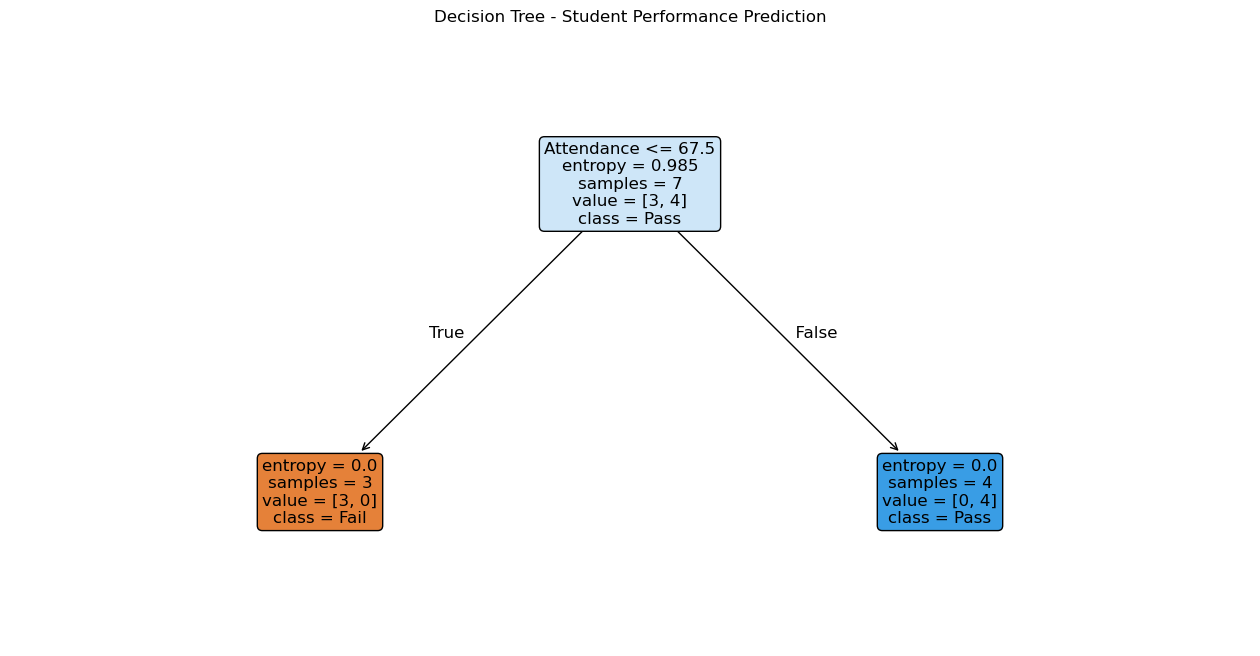

In [28]:
# ==============================
# Step 8: Visualize Decision Tree
# ==============================
plt.figure(figsize=(16, 8))

plot_tree(
    model,
    feature_names=X.columns,
    class_names=model.classes_,
    filled=True,
    rounded=True,
    fontsize=12
)

plt.title("Decision Tree - Student Performance Prediction")
plt.show()


In [30]:
# ==============================
# Step 9: Take Testing Values from User
# ==============================

print("\nEnter Student Details for Prediction")

attendance = float(input("Enter Attendance Percentage (0–100): "))
study_hours = float(input("Enter Daily Study Hours: "))
internal_marks = float(input("Enter Internal Marks (0–100): "))
assignment_score = float(input("Enter Assignment Score (0–100): "))

# Convert user input into DataFrame with feature names
user_input = pd.DataFrame(
    [[attendance, study_hours, internal_marks, assignment_score]],
    columns=['Attendance', 'StudyHours', 'InternalMarks', 'AssignmentScore']
)

# Predict student performance
prediction = model.predict(user_input)

print("Predicted Student Performance:", prediction[0])


Enter Student Details for Prediction


Enter Attendance Percentage (0–100):  89
Enter Daily Study Hours:  8
Enter Internal Marks (0–100):  89
Enter Assignment Score (0–100):  99


Predicted Student Performance: Pass
